
# Laboratorio 2(Regresion logistica) Grupo 1
 <h3>Implementacion del modelo de regresion logistica para realizar predicciones.<h3>
 <HR>
 <h3>
  NOMBRE: POLO ORELLANA BRAYAN SIMON <br>
  CARRERA: INGENIERIA DE SISTEMAS <BR>
  FECHA: 12/03/2024 <BR>

  * [Enlace de invitacion para ser colaborador](https://github.com/bspoloo/SIS420-012024/invitations)
  
  * [Enlace al git hub](https://github.com/bspoloo/SIS420-012024/tree/main/Laboratorios/Laboratorio%202)
  
  * [Enlace al Colab](https://colab.research.google.com/github/bspoloo/SIS420-012024/blob/main/Laboratorios/Laboratorio%202/Laboratorio%202.ipynb?hl=es)
 <h3>

Para el laboratorio hizo uso del para entrenar el modelo de **Regresion Logistica** y predecir si un paciente tiene alguna enfermedad cardiovascular.

Estos problemas a menudo se deben a la aterosclerosis. Esta afección ocurre cuando la grasa y el colesterol se acumulan en las paredes del vaso sanguíneo (arteria). El enlace al dataset es [Cardiovascular Disease dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset).

El archivo `cardiovascular_diseases_dv3.csv` contiene un conjunto de datos de entrenamiento de datos si un paciente tiene una enfermedad cardiovascular.

## 1. Regresion Logistica

Realizamos las respectivas importaciones de librerias.

In [1]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

### 1.1 Cargamos los datos del dataset
cargamos los datos haciendo el uso de la libreria **Pandas** que  es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL. Algunas de las funcionalidades clave de pandas incluyen:

En la siguiente tabla impresa se puede ver lo siguiente, el cual son las caracteristicas del dataset:

**Variables de entrada(X):**

1. **age(Edad).-** Se refiere a la edad del paciente en años.
2. **gender(Genero).-** Hace referencia al genero del paciente, 1 si es hombre y 2 si es mujer.
3. **height(Altura).-** Es la altura del paciente medido en cm.
4. **weight(Peso).-** Es el peso del paciente medido en Kg
5. **ap_hight(Presión arterial sistólica).-** Presión arterial sistólica del paciente.
6. **ap_low(Presión arterial diastólica).-** Presión arterial diastólica del paciente.
7. **cholesterol(Colesterol).-** Nivel de colesterol en el paciente donde. 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal.
8. **glocose(Glucosa).-** Nivel de glucosa del paciente donde. 1: normal, 2: por encima de lo normal, 3: muy por encima de lo normal.
9. **smoke(Fuma).-** Indica si el paciente fuma. 1:Si y 2:No.
10. **alcohol(alcohol).-** Indica si el paciente consume alcohol. 1:Si y 2:No.
11. **fhisycal activity(Actividad fisica).-** Indical si el paciente realiza algun tipo de actividad fisica donde. 1:Si y 2:No.

**Variable de salida(y):**

1. **cardiovascular disease(Enfermedad cardiovascular).-** Presencia o ausencia de enfermedad cardiovascular, donde: 1:Si y 2:No.

In [2]:
#Haciendo uso de la libreria pandas para leer el dataset.
dataset = pd.read_csv('cardiovascular_diseases_dv3.csv', delimiter=';')

#Imprimimos en una tabla el dataset para hacer un analisis mas claro.
dataset

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


### 1.2 Separamos los datos
Separamos los datos donde el 80% de los datos del dataset seran para el entrenamiento del modelo, mientras que el 20% restante del dataset sera usando para hacer las pruebas y validaciones correspondientes.

In [3]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

#Separamos en X_test los datos, pero dropeando nuestra y que seria 'CARDIO_DISEASE'
X_test = test_dataset.drop(['CARDIO_DISEASE'], axis=1).values

#Separamos en y_test los datos, pero solo cargando la columna de 'CARDIO_DISEASE', ya que esa sera nuestra y
y_test = test_dataset['CARDIO_DISEASE'].values

# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'CARDIO_DISEASE' para y_train
X_train = train_dataset.drop(['CARDIO_DISEASE'], axis=1).values
y_train = train_dataset['CARDIO_DISEASE'].values
m_train = len(y_train)


#Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:12.0f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], X_train[i, 10], y_train[i]
    ))

#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         Y
--------------------------------------------------------------------------------------------------------------
      50       1       173        72     120      70       1       1       0         0       1           1
      62       2       174        52     120      80       1       1       1         0       1           1
      46       2       156        62     115      70       1       1       0         0       1           0
      58       1       158        90     140      90       1       1       0         0       1           1
      62       1       156        90     160      80       3       3       0         0       1           0
      60       1       151        44     120      80       1       2       0         0       1           0
      40       1       156        56     120      70       1       1       0         0       1           0
      45       1       157        

### 1.2 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. Se aplica la normalizacion esto debido a que los datos de las X estan a diferentes escalas.

Hacemos el uso de la siguiente funcion para normalizar los datos de las columnas X:

In [4]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


Almacenando los datos normalizados en **X_norm** usando la funcion **featureNormaliza()**, normalizando los datos de X_train

In [5]:
X_norm, mu, sigma= featureNormalize(X_train)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
  -0.495  -0.730     1.058    -0.146  -0.393  -1.183  -0.538  -0.396  -0.310    -0.238   0.497
   1.281   1.370     1.180    -1.543  -0.393  -0.143  -0.538  -0.396   3.226    -0.238   0.497
  -1.087   1.370    -1.024    -0.844  -0.692  -1.183  -0.538  -0.396  -0.310    -0.238   0.497
   0.689  -0.730    -0.779     1.112   0.803   0.896  -0.538  -0.396  -0.310    -0.238   0.497
   1.281  -0.730    -1.024     1.112   1.999  -0.143   2.401   3.085  -0.310    -0.238   0.497
   0.985  -0.730    -1.636    -2.102  -0.393  -0.143  -0.538   1.345  -0.310    -0.238   0.497
  -1.974  -0.730    -1.024    -1.263  -0.393  -1.183  -0.538  -0.396  -0.310    -0.238   0.497
  -1.235  -0.730    -0.901    -2.172  -0.393  -0.143  -0.538  -0.396  -0.310    -0.238   0.497
   0.393  -0.730     0.323     0.

Añadimos una columan de unos a la matriz de X_norm, esto para hacer complemento a Theta cero:

In [6]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# print(len(X_ready[0]))

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11]
    ))


  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.495    -0.730     1.058  -0.146  -0.393  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   1.281     1.370     1.180  -1.543  -0.393  -0.143  -0.538  -0.396     3.226  -0.238   0.497
   1.000  -1.087     1.370    -1.024  -0.844  -0.692  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.689    -0.730    -0.779   1.112   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   1.281    -0.730    -1.024   1.112   1.999  -0.143   2.401   3.085    -0.310  -0.238   0.497
   1.000   0.985    -0.730    -1.636  -2.102  -0.393  -0.143  -0.538   1.345    -0.310  -0.238   0.497
   1.000  -1.974    -0.730    -1.024  -1.263  -0.393  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -1.235    -0.730    -0.901  -2.1

### 1.3 Creacion de la funcion Sigmoide
También conocida como la función logística, es una función matemática que toma cualquier número real como entrada y devuelve un valor en el rango de 0 a 1. Donde nuestra **Z** es nuestra hipotesis.

In [7]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5.

In [8]:
print(sigmoid(0))

0.5


Experimentando con otros valores de `z`. por ejemplo un array.

In [9]:
z = [0.5, 6, 5]
print(sigmoid(z))

[0.62245933 0.99752738 0.99330715]


### 1.4 Descenso por el gradiente
Al igual que regresion lineal se aplicara el descenso por la gradiente, con la diferencia que aqui se hara el uso de la funcion **sigmoid()**:

#### 1.4.1 Cálculo del costo $J(\theta)$

In [10]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    
    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

#### 1.4.2 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico. haciendo uso de la **sigmoid()**

In [11]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.009.

In [12]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite = 900
alpha = 0.009

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")


########################################################################################################
Los valores de theta calculados son:
theta 1: -0.004257685920909463
theta 2: 0.3044827570146754
theta 3: -0.01249678210356872
theta 4: -0.03148555570834074
theta 5: 0.16772202914830697
theta 6: 0.576387737779135
theta 7: 0.3181478177267446
theta 8: 0.2658035486972091
theta 9: 0.010987464340882876
theta 10: -0.037013399897440485
theta 11: -0.034055115173726884
theta 12: -0.07353863340382433
########################################################################################################
con un costo de: 0.5673536009103864 


### 1.5 Grafica de la convergencia del costo
Se utilizan los parametros finales para grafical la linea, graficamos el costo:

Text(0, 0.5, 'Costo J')

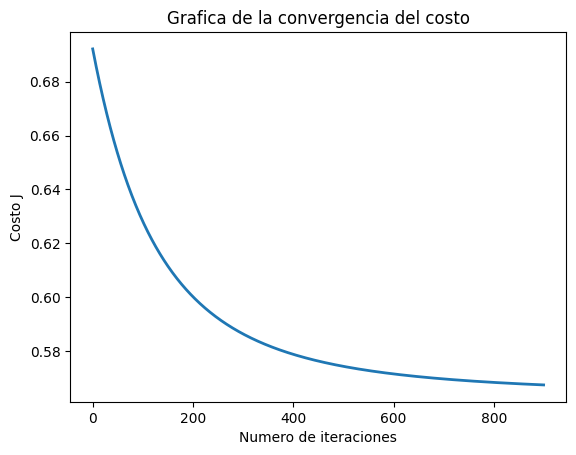

In [13]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Haciendo la prueba con un ejemplo

In [14]:
X_array = [1,58,1,159,53,110,70,1,1,0,0,1]
X_array_copy = X_array.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array[1:] = (X_array[1:] - mu) / sigma

resultados = sigmoid(np.dot(X_array, theta)) 

print(f"Una persona con las caracteristicas: {X_array_copy} ")
print(f'Tiene una probabilidad de tener diabetes de: {resultados * 100} %')

print(f"Con valores de theta: { theta }")

Una persona con las caracteristicas: [1, 58, 1, 159, 53, 110, 70, 1, 1, 0, 0, 1] 
Tiene una probabilidad de tener diabetes de: 24.532474098172727 %
Con valores de theta: [-0.00425769  0.30448276 -0.01249678 -0.03148556  0.16772203  0.57638774
  0.31814782  0.26580355  0.01098746 -0.0370134  -0.03405512 -0.07353863]


### 1.6 Ejemplos de Predicciones
Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

#### 1.6.1 Definiendo nuestro umbral clasificador
Donde:

* Si $h(\theta)$ >= 0.5, predice "y = 1".
* Si $h(\theta)$ < 0.5 , predice "y = 0".

In [15]:
nombres_columnas = ['AGE','GENDER','HEIGHT','WEIGHT','AP_HIGH','AP_LOW','CHOLESTEROL','GLUCOSE','SMOKE','ALCOHOL','PHYSICAL_ACTIVITY','CARDIO_DISEASE', 'CARDIO_DISEASE(Si/No)']

matriz_datos = np.array([
[50,2,168,62,110,80,1,1,0,0,1],
[62,1,165,68,150,80,2,1,0,0,0],
[58,1,153,78,140,90,2,1,0,0,1],
[46,1,169,64,120,80,3,1,0,0,1],
[46,1,158,58,110,80,1,1,0,0,1],
[60,2,170,69,120,80,1,1,1,1,1],
[52,2,171,98,110,90,1,1,0,0,1],
[52,1,153,63,110,70,2,1,0,0,1],
[59,2,165,65,120,80,1,1,0,0,1],
[64,1,148,50,120,80,2,1,0,0,1],
[54,2,169,55,120,80,1,1,1,0,1],
])

para_tabla = matriz_datos.copy()
#creamos un vector parta almacenar cada Y predicha
y_pre = []

matriz_datos = (matriz_datos- mu) / sigma
matriz_datos = np.concatenate([np.ones((len(matriz_datos), 1)), matriz_datos], axis=1)

# Calculamos la Y predicha de los 11 ejemplos de prediccion
# Calculamos la Y predicha de cada fila de la matriz
for j in matriz_datos:
    y_pre.append(sigmoid(np.dot(j, theta)))

# Convertimos la lista a un array unidimensional

y_pre = np.array(y_pre)

# usamos umbral para definir si tiene o no la enfermedad
y_pre_umbral = (y_pre >= 0.5).astype(int)

para_tabla = np.column_stack((para_tabla, y_pre))
para_tabla = np.column_stack((para_tabla, y_pre_umbral))
# Convertir la matriz en una lista de listas
datos_para_tabla = para_tabla.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+-------+----------+----------+----------+-----------+----------+---------------+-----------+---------+-----------+---------------------+------------------+-------------------------+
|   AGE |   GENDER |   HEIGHT |   WEIGHT |   AP_HIGH |   AP_LOW |   CHOLESTEROL |   GLUCOSE |   SMOKE |   ALCOHOL |   PHYSICAL_ACTIVITY |   CARDIO_DISEASE |   CARDIO_DISEASE(Si/No) |
+=======+==========+==========+==========+===========+==========+===============+===========+=========+===========+=====================+==================+=========================+
|    50 |        2 |      168 |       62 |       110 |       80 |             1 |         1 |       0 |         0 |                   1 |         0.248073 |                       0 |
+-------+----------+----------+----------+-----------+----------+---------------+-----------+---------+-----------+---------------------+------------------+-------------------------+
|    62 |        1 |      165 |       68 |       150 |       80 |             2 |    

## 1.7 Validaciones
Para hacer las validaciones correspondientes se hizo el uso siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

#### 1.7.1 Normalizamos el X_test que es el 20% separado a un incio:

In [16]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

#### 1.7.2 Concadenamos unos a matriz X normalizado del test:

In [17]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]
--------------------------------------------------------------------------------------------------------------
   1.000  -0.643    -0.730    -1.024  -0.844  -1.589  -1.183   0.931  -0.396    -0.310  -0.238   0.497
   1.000   0.393    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.541    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497
   1.000   0.097    -0.730     0.323   2.160   1.999   1.935  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.199    -0.730    -2.982   0.204   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.495    -0.730     0.445  -0.076   1.401   0.896  -0.538  -0.396    -0.310  -0.238  -2.014
   1.000   1.281     1.370    -0.534   0.902  -0.991  -1.183  -0.538  -0.396    -0.310  -0.238   0.497
   1.000  -0.643    -0.730    -1.146   1.671  -0.393  -0.143  

#### 1.7.3 Hacemos el calculo de Y predicha 

In [20]:
y_predicha =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta.T)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]','y','(y) usando el umbral'
))
print('-' * 140)

#Mostrando algunos datos
for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], y_predicha[i], y_umbral[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.643    -0.730    -1.024  -0.844  -1.589  -1.183   0.931  -0.396    -0.310  -0.238   0.497           0.20              0
   1.000   0.393    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497           0.43              0
   1.000   0.541    -0.730    -0.044   0.274  -0.393  -0.143  -0.538  -0.396    -0.310  -0.238   0.497           0.45              0
   1.000   0.097    -0.730     0.323   2.160   1.999   1.935  -0.538  -0.396    -0.310  -0.238   0.497           0.88              1
   1.000  -0.199    -0.730    -2.982   0.204   0.803   0.896  -0.538  -0.396    -0.310  -0.238   0.497           0.66              1
   1.000  -0.495    -0.730     0.445  -0.076   1.401 

#### 1.7.4 Calculando la precision del entrenamiento:
se hace uso del **np.mean**, Calcula la media (promedio) de los valores booleanos. Dado que True se interpreta como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de elementos iguales en **y_predicha** e **y_test**.

In [22]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 72.65 %


#### 1.7.5 Concluciones

Se puede observar que la precision de prediccion es de un 72.65%, lo cual esta por encima del 50% pero casi por muy debajo del 100%, si bien nos predicciones casi acertadas en un 72.65% no es muy confiable para predicciones relacionadas a **enfermedades cardiovasculares**, la precisión del 72.65% podría indicar que el modelo tiene cierto grado de capacidad predictiva, pero puede que no sea suficientemente alto para algunos casos clínicos donde la precisión es crítica.